# Generating images

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from pathlib import Path
from PIL import Image
import io

### Pandas options

In [2]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

## File paths

In [3]:
root = Path()
info_path = root / 'info'
data_proc = root / 'data' / 'data_proc'
out_path =root / 'output'
out_path.mkdir(exist_ok=True)
out_tables = out_path / 'exracted_tables'
out_tables.mkdir(exist_ok=True)
stats_subj_file_name = out_tables / 'stats_full_subj_protocol.pkl'
stats_prot_file_name = out_tables / 'stats_full_exp_protocol.pkl'
out_path.mkdir(exist_ok=True)
save_fig_path = out_path / 'figs'
stats_fig_path = save_fig_path / 'subject_stats'
global_fig_path = save_fig_path / 'global_stats'
save_fig_path.mkdir(exist_ok=True)
stats_fig_path.mkdir(exist_ok=True)
global_fig_path.mkdir(exist_ok=True)

In [4]:
cha_dict_file = info_path / 'channels_code_proc.json'
with open(cha_dict_file) as f:
   cha_dict_aux = json.load(f)
f.close()
cha_dict = {}
for i in cha_dict_aux:
   cha_dict[i['Simple_code']] =  i['Latex']

## Reading Global data

In [5]:
df_stats_global = pd.read_pickle(stats_prot_file_name)
df_stats_global.head()

Activity   Left Right                                                    \
Type        Imaginary                                                     
Channel            F3                                      F6             
stats            mean    median       std   std pop      mean    median   
Time Sacle                                                                
4            0.541775  0.554409  0.197035  0.196731  0.420401  0.423464   
5            0.563364  0.587921  0.190545  0.190251  0.444202  0.460332   
7            0.605649  0.623070  0.180437  0.180158  0.493128  0.512871   
9            0.644752  0.671833  0.171125  0.170860  0.539915  0.570159   
11           0.677200  0.710921  0.162461  0.162210  0.579833  0.616254   

Activity                                                                \
Type                                                                     
Channel                               P3                                 
stats            std   std pop      mean    median       std   std pop   
Time Sacle                                                               
4           0.250254  0.249867  0.612472  0.612769  0.144103  0.143881   
5           0.244084  0.243707  0.606736  0.611271  0.139605  0.139390   
7           0.234354  0.233992  0.607652  0.620376  0.132675  0.132470   
9           0.225806  0.225457  0.618273  0.630097  0.128528  0.128330   
11          0.217121  0.216786  0.631435  0.646092  0.125831  0.125637   

Activity                                                                \
Type                                                    Real             
Channel           P6                                      F3             
stats           mean    median       std   std pop      mean    median   
Time Sacle                                                               
4           0.522980  0.515150  0.161606  0.161356  0.550335  0.562438   
5           0.512913  0.507929  0.156207  0.155965  0.573184  0.584344   
7           0.508250  0.516161  0.148848  0.148618  0.618186  0.646876   
9           0.516655  0.526236  0.146057  0.145832  0.659858  0.696983   
11          0.529991  0.540047  0.145215  0.144991  0.694479  0.727089   

Activity                                                                \
Type                                                                     
Channel                               F6                                 
stats            std   std pop      mean    median       std   std pop   
Time Sacle                                                               
4           0.189246  0.188954  0.429345  0.421283  0.241406  0.241033   
5           0.182762  0.182480  0.455792  0.452905  0.236053  0.235689   
7           0.172826  0.172559  0.509718  0.534636  0.227649  0.227297   
9           0.163941  0.163687  0.560916  0.601827  0.219351  0.219012   
11          0.155737  0.155496  0.604350  0.643072  0.210271  0.209946   

Activity                                                                \
Type                                                                     
Channel           P3                                      P6             
stats           mean    median       std   std pop      mean    median   
Time Sacle                                                               
4           0.616866  0.604267  0.144057  0.143834  0.529192  0.520570   
5           0.611127  0.607152  0.139489  0.139273  0.520159  0.517643   
7           0.611764  0.621862  0.132301  0.132096  0.516910  0.521074   
9           0.622418  0.629276  0.128158  0.127960  0.526728  0.539603   
11          0.636147  0.642667  0.125601  0.125407  0.541801  0.551742   

Activity                        Top Down                                \
Type                           Imaginary                                 
Channel                               F3                                 
stats            std   std pop      mean    median       std   

## Reading per Subject Data

In [6]:
df_stats = pd.read_pickle(stats_subj_file_name)
# df_stats = df_stats.reorder_levels(order=[0,4,1,2,3], axis=1)
# df_stats.columns.set_names('Experiment', level=1, inplace=True)
df_stats.head()


Subject          S001                                                    \
Activity   Left Right                                                     
Type        Imaginary                                                     
Channel            F3                                      F6             
stats            mean    median       std   std pop      mean    median   
Time Sacle                                                                
4            0.760115  0.767819  0.015570  0.012713  0.712169  0.721792   
5            0.775095  0.781702  0.011784  0.009622  0.730458  0.739040   
7            0.798796  0.802250  0.008186  0.006683  0.758613  0.764650   
9            0.814346  0.816864  0.006979  0.005699  0.776269  0.781556   
11           0.824190  0.826941  0.006648  0.005428  0.786787  0.791116   

Subject                                                                 \
Activity                                                                 
Type                                                                     
Channel                               P3                                 
stats            std   std pop      mean    median       std   std pop   
Time Sacle                                                               
4           0.019579  0.015986  0.588213  0.582160  0.024119  0.019693   
5           0.015178  0.012393  0.592179  0.590513  0.018611  0.015196   
7           0.010858  0.008866  0.612099  0.616211  0.011634  0.009499   
9           0.009400  0.007675  0.635807  0.639234  0.009070  0.007406   
11          0.009107  0.007436  0.658666  0.660049  0.008232  0.006721   

Subject                                                                 \
Activity                                                                 
Type                                                    Real             
Channel           P6                                      F3             
stats           mean    median       std   std pop      mean    median   
Time Sacle                                                               
4           0.507069  0.493141  0.026577  0.021700  0.731048  0.771867   
5           0.507842  0.496800  0.021278  0.017373  0.749314  0.781686   
7           0.525909  0.518397  0.013280  0.010843  0.780484  0.799010   
9           0.551271  0.547410  0.008861  0.007235  0.802943  0.811369   
11          0.577690  0.576149  0.007265  0.005932  0.818416  0.819600   

Subject                                                                 \
Activity                                                                 
Type                                                                     
Channel                               F6                                 
stats            std   std pop      mean    median       std   std pop   
Time Sacle                                                               
4           0.087540  0.071476  0.672233  0.735436  0.123994  0.101240   
5           0.076304  0.062302  0.696684  0.747087  0.105543  0.086175   
7           0.057383  0.046853  0.736201  0.766870  0.076789  0.062698   
9           0.043948  0.035884  0.763107  0.779908  0.057269  0.046760   
11          0.035131  0.028685  0.780752  0.787619  0.044623  0.036435   

Subject                                                                 \
Activity                                                                 
Type                                                                     
Channel           P3                                      P6             
stats           mean    median       std   std pop      mean    median   
Time Sacle                                                               
4           0.590961  0.582785  0.029162  0.023811  0.513047  0.497509   
5           0.590235  0.581037  0.027802  0.022700  0.510086  0.492883   
7           0.604332  0.593213  0.026308  0.021480  0.523012  0.503452   
9           0.625288  0.613052  0.024954  0.020375  0.545080  0

## Generating images for all the subjects

In [7]:
# image options
color = ['royalblue',  'gold', 'firebrick', 'seagreen']
marks = ['o',  's', 'D', '^' ]
mrk_size = [1.5, 1, 1 ,1.1]
use_title = False

# log ticks formatting
formatter_x = ScalarFormatter()
formatter_x.set_scientific(False)

# Configure or save image options
img_config = not True
save_eps = False
max_display_img_config = 3

stat_name = 'mean'

col_lev_list = df_stats.columns.levels

subj_list = col_lev_list[0]

exp_protocol_list = pd.MultiIndex.from_product( df_stats.columns.levels[1:3])

channels = col_lev_list[3]

if img_config ==  True:
    subj_list = subj_list[:max_display_img_config]

# for each subject
for subj_code in subj_list:
    # create plot
    fig,ax = plt.subplots(2,2, figsize=(18,9))

    if use_title == True:
        fig.suptitle('Subject code: {} '.format(subj_code ), fontsize=35, y=1)

    fig.supylabel('$DMC_{x}^{2}$', fontsize=25, x=0.05)
    fig.supxlabel('Time window size ($n$)', fontsize=25)

    min_y = 0
    max_y = 1.1

    for i_ex, exp_protocol in enumerate(exp_protocol_list):

        # slice dataframes
        df_aux = df_stats.loc[:, ([subj_code], [exp_protocol[0]], [exp_protocol[1]], slice(None), [stat_name] ) ]
  
        # for each experiment

        fig_row = i_ex//2
        fig_col = i_ex%2

        ax[fig_row][fig_col].set_title(" - ".join(exp_protocol) , fontsize=15)

        ax[fig_row][fig_col].set_ylim([min_y, max_y])

        ax[fig_row][fig_col].set_facecolor("#dfdfdf")
        #ax[fig_row][fig_col].loglog()
        ax[fig_row][fig_col].semilogx()
    
        ax[fig_row][fig_col].xaxis.set_major_formatter(formatter_x)
        ax[fig_row][fig_col].set_yticks(np.arange(0,1.1,0.25))
        ax[fig_row][fig_col].grid(visible=True, which='both', axis='both',  linestyle='dashdot', linewidth=.5)

        # for each channel
        for i_ch , chan in enumerate(channels):

            ax[fig_row][fig_col].plot(df_aux.index.values, df_aux.loc[:, (slice(None), slice(None), slice(None),[chan]) ], c= color[i_ch], marker=marks[i_ch], label = '${}$'.format(cha_dict[chan]), markersize=6* mrk_size[i_ch],  linestyle=':', alpha=.8 ,linewidth=1.5)

        # janela temporal da figura
        ax[fig_row][fig_col].axvline(x=65.6, color='indigo', linestyle='dashed',alpha=.50,linewidth=2.5)

    # Legenda
    ax[1,1].legend( title = "Y variable\nchannel:", title_fontsize=12, bbox_to_anchor=(1,1.45), loc='upper left',  prop={'size': 15})

    # config or save images
    if img_config == True:
        fig.show()
    else:
        fig_file_name = stats_fig_path / (subj_code + '.jpg')
        fig.savefig(fig_file_name)
        # Save the image in memory in PNG format
        if save_eps == True:
            fig_file_name = fig_file_name.with_suffix('.eps')
            with io.BytesIO() as png1:
                fig.savefig(png1, format="png")
                # Load this image into PIL
                with Image.open(png1) as png2:
                # Save as eps
                    png2 = png2.convert('RGB')
                    png2.save(fig_file_name)
        # Close images
        plt.close()
        fig.clf()
        print(subj_code, end="...")
print('END')


S001...S002...S003...S004...S005...S006...S007...S008...S009...S010...S011...S012...S013...S014...S015...S016...S017...S018...S019...S020...S021...S022...S023...S024...S025...S026...S027...S028...S029...S030...S031...S032...S033...S034...S035...S036...S037...S038...S039...S040...S041...S042...S043...S044...S045...S046...S047...S048...S049...S050...S051...S052...S053...S054...S055...S056...S057...S058...S059...S060...S061...S062...S063...S064...S065...S066...S067...S068...S069...S070...S071...S072...S073...S074...S075...S076...S077...S078...S079...S080...S081...S082...S083...S084...S085...S086...S087...S088...S089...S090...S091...S092...S093...S094...S095...S096...S097...S098...S099...S100...S101...S102...S103...S104...S105...S107...S108...S109...END


# Global images

D:\Users\Nando\AppData\Local\Temp\ipykernel_15052\2465165687.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\Users\Nando\AppData\Local\Temp\ipykernel_15052\2465165687.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\Users\Nando\AppData\Local\Temp\ipykernel_15052\2465165687.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\Users\Nando\AppData\Local\Temp\ipykernel_15052\2465165687.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


END


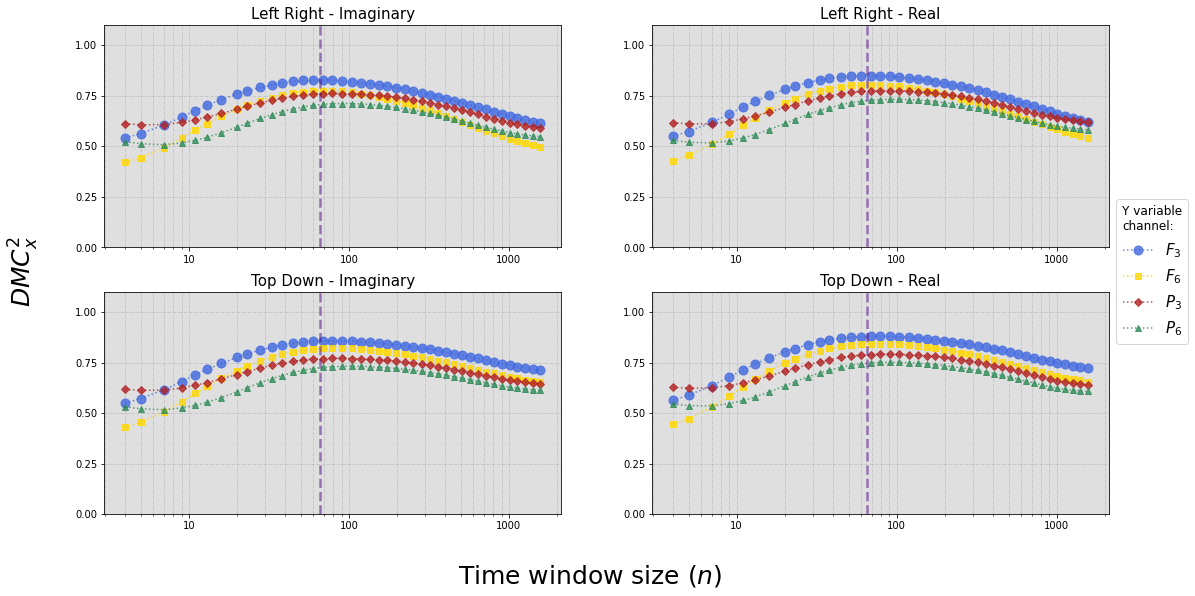

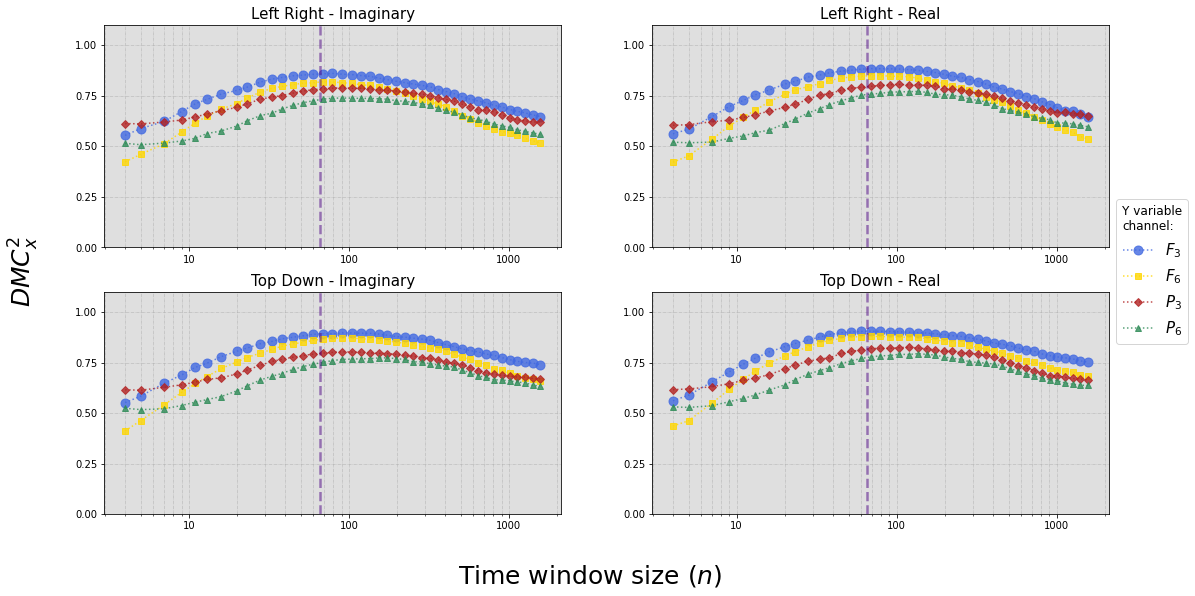

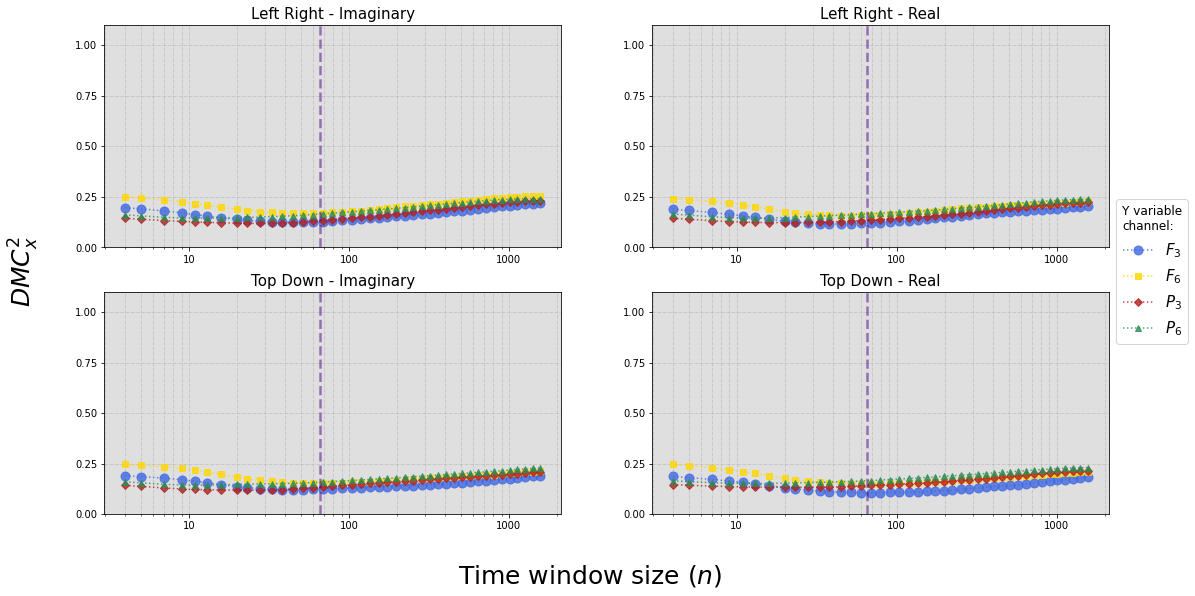

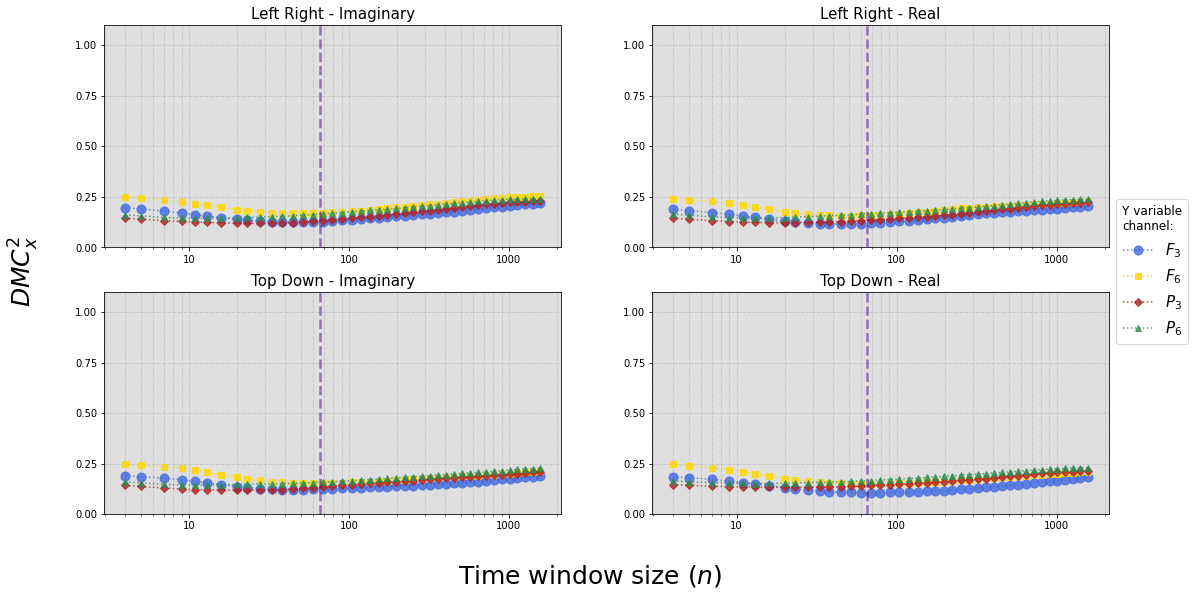

In [8]:
# image options
color = ['royalblue',  'gold', 'firebrick', 'seagreen']
marks = ['o',  's', 'D', '^' ]
mrk_size = [1.5, 1, 1 ,1.1]
use_title = False


# log ticks formatting
formatter_x = ScalarFormatter()
formatter_x.set_scientific(False)

# Configure or save image options
img_config =  True
save_eps = False
max_display_img_config = 5

col_lev_list = df_stats_global.columns.levels

stats_list = col_lev_list[3]

exp_protocol_list = pd.MultiIndex.from_product( col_lev_list[0:2])

channels = col_lev_list[2]

if img_config ==  True:
    subj_list = subj_list[:max_display_img_config]

# for each subject
for stat_name in stats_list:
    # create plot
    fig,ax = plt.subplots(2,2, figsize=(18,9))

    if use_title == True:
        fig.suptitle('Global stats: {} '.format(stat_name), fontsize=35, y=1)

    fig.supylabel('$DMC_{x}^{2}$', fontsize=25, x=0.05)
    fig.supxlabel('Time window size ($n$)', fontsize=25)

    min_y = 0
    max_y = 1.1

    for i_ex, exp_protocol in enumerate(exp_protocol_list):

        # slice dataframes
        df_aux = df_stats_global.loc[:, ([exp_protocol[0]], [exp_protocol[1]], slice(None), [stat_name] ) ]
  
        # for each experiment
        fig_row = i_ex//2
        fig_col = i_ex%2

        ax[fig_row][fig_col].set_title(" - ".join(exp_protocol) , fontsize=15)

        ax[fig_row][fig_col].set_ylim([min_y, max_y])

        ax[fig_row][fig_col].set_facecolor("#dfdfdf")
        #ax[fig_row][fig_col].loglog()
        ax[fig_row][fig_col].semilogx()
    
        ax[fig_row][fig_col].xaxis.set_major_formatter(formatter_x)
        ax[fig_row][fig_col].set_yticks(np.arange(0,1.1,0.25))
        ax[fig_row][fig_col].grid(visible=True, which='both', axis='both',  linestyle='dashdot', linewidth=.5)

        # for each channel
        for i_ch , chan in enumerate(channels):

            ax[fig_row][fig_col].plot(df_aux.index.values, df_aux.loc[:, (slice(None), slice(None), [chan], slice(None) ) ], c= color[i_ch], marker=marks[i_ch], label = '${}$'.format(cha_dict[chan]), markersize=6* mrk_size[i_ch],  linestyle=':', alpha=.8 ,linewidth=1.5)

        # janela temporal da figura
        ax[fig_row][fig_col].axvline(x=65.6, color='indigo', linestyle='dashed',alpha=.50,linewidth=2.5)

    # Legenda

    ax[1,1].legend( title = "Y variable\nchannel:", title_fontsize=12, bbox_to_anchor=(1,1.45), loc='upper left',  prop={'size': 15})

    # config or save images
    if img_config == True:
        fig.show()
    else:
        fig_file_name = global_fig_path / (stat_name + '.jpg')
        fig.savefig(fig_file_name)
        # Save the image in memory in PNG format
        if save_eps == True:
            fig_file_name = fig_file_name.with_suffix('.eps')
            with io.BytesIO() as png1:
                fig.savefig(png1, format="png")
                # Load this image into PIL
                with Image.open(png1) as png2:
                # Save as eps
                    png2 = png2.convert('RGB')
                    png2.save(fig_file_name)
            
        # Close images
        plt.close()
        fig.clf()
        print(stat_name, end="...")
print('END')